## Extract colour, intensity and texture features from the images of ArtEmis/Wikiart.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns
import os.path as osp
from PIL import Image
from ast import literal_eval
from IPython.display import display

from emotions import ARTEMIS_EMOTIONS, LARGER_EMOTION_VOCAB, positive_negative_else
from data_analysis.color_extraction import extract_color_features, extract_intensity_features, extract_composition_features, extract_texture_features
from evaluation.metaphors import metaphorical_substrings

sns.set()
%load_ext autoreload
%autoreload 2

/opt/anaconda3/lib/python3.8/site-packages/scipy/__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "


In [2]:
artemis_merged_csv = '/Users/Cherry0904/Desktop/data_with_img_features/merge_df.csv'
artemis_merged_df = pd.read_csv(artemis_merged_csv, encoding='utf-8')
# artemis_merged_df = pd.read_csv(artemis_merged_csv, encoding='utf-8', converters={'image_feature_vector':literal_eval})
# artemis_raw_df['index'] = range(1, len(artemis_raw_df) + 1)
artemis_merged_df.columns


Index(['Unnamed: 0', 'art_style', 'painting', 'emotion', 'utterance',
       'repetition', 'split', 'tokens', 'tokens_len', 'utterance_spelled',
       'tokens_encoded', 'emotion_label', 'pne', 'image_feature_vector',
       'normalised_image_feature_vector'],
      dtype='object')

In [3]:
df = artemis_merged_df
df.shape

(454684, 15)

In [4]:
# Convert the image_feature_vector from the string of lists into an actual list
from ast import literal_eval
import re
df.image_feature_vector = df.image_feature_vector.apply(lambda x: literal_eval(','.join(re.sub(r'(?<=\d)(\s+)(?=-?\d)', ',', x).splitlines())))
print(type(df.image_feature_vector[0]))

<class 'list'>


In [5]:
# Separate the image features into multiple columns 
df[['h_mean', 'h_std', 's_mean', 's_std', 'v_mean', 'v_std', 'int_mean', 'int_std', 'ave_contrast', 'ave_correlation', 'ave_energy', 'ave_homogeneity', 'num_of_lines', 'mean_len']] = pd.DataFrame(df.image_feature_vector.tolist(), index=df.index)
df.columns

Index(['Unnamed: 0', 'art_style', 'painting', 'emotion', 'utterance',
       'repetition', 'split', 'tokens', 'tokens_len', 'utterance_spelled',
       'tokens_encoded', 'emotion_label', 'pne', 'image_feature_vector',
       'normalised_image_feature_vector', 'h_mean', 'h_std', 's_mean', 's_std',
       'v_mean', 'v_std', 'int_mean', 'int_std', 'ave_contrast',
       'ave_correlation', 'ave_energy', 'ave_homogeneity', 'num_of_lines',
       'mean_len'],
      dtype='object')

#### Analysis of real-valued image features

In [94]:
df.groupby('emotion', as_index=False)['h_mean'].mean()

,emotion,h_mean
0,amusement,45.512153
1,anger,44.740733
2,awe,46.620847
3,contentment,47.005731
4,disgust,43.426192
5,excitement,48.140903
6,fear,44.907174
7,sadness,43.112123
8,something else,45.299743


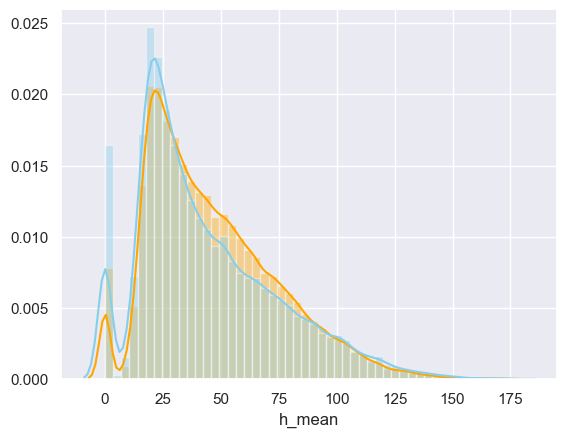

In [88]:
sns.distplot(df.loc[df['pne'] == 0]['h_mean'] , color="orange", label="Positive")
sns.distplot(df.loc[df['pne'] == 1]['h_mean'] , color="skyblue", label="Negative")
# sns.distplot(df.loc[df['pne'] == 2]['h_mean'] , color="green", label="Something-else")
plt.show()

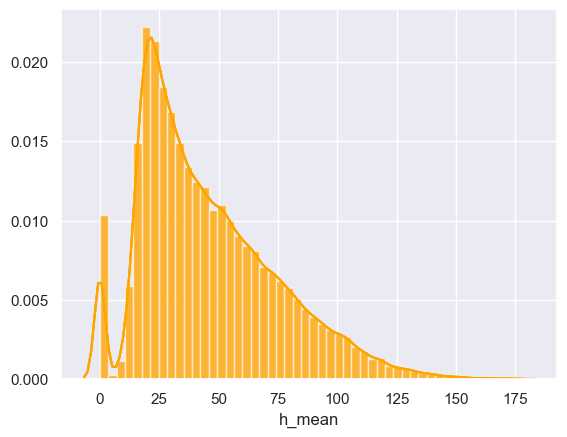

In [13]:
sns.distplot(df['h_mean'] , color="orange", label="Hue_mean")
plt.show()

In [40]:
df.groupby('emotion', as_index=False)['h_std'].mean()

,emotion,h_std
0,amusement,37.119442
1,anger,35.800088
2,awe,36.737037
3,contentment,36.122330
4,disgust,35.352997
5,excitement,37.961467
6,fear,34.829475
7,sadness,34.137813
8,something else,34.775678


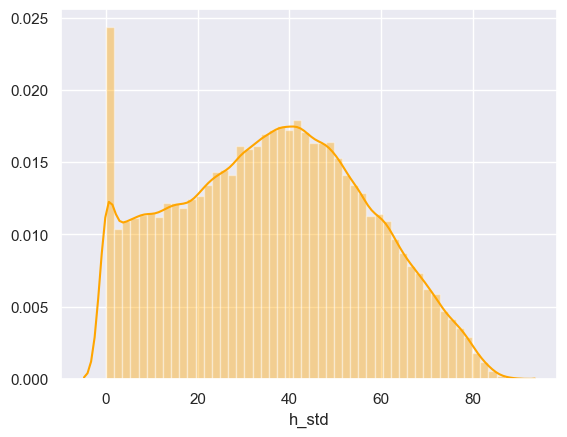

In [14]:
sns.distplot(df['h_std'] , color="orange", label="Hue_mean")
plt.show()

In [41]:
df.groupby('emotion', as_index=False)['s_mean'].mean()

,emotion,s_mean
0,amusement,87.889158
1,anger,84.677375
2,awe,86.204916
3,contentment,86.673060
4,disgust,87.047171
5,excitement,90.274623
6,fear,79.948419
7,sadness,81.730443
8,something else,81.909079


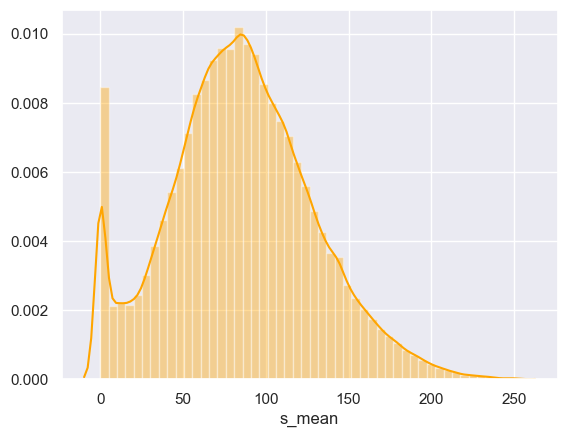

In [15]:
sns.distplot(df['s_mean'] , color="orange", label="saturation_mean")
plt.show()

In [42]:
df.groupby('emotion', as_index=False)['s_std'].mean()

,emotion,s_std
0,amusement,44.998348
1,anger,42.368240
2,awe,43.489926
3,contentment,44.084186
4,disgust,43.303011
5,excitement,47.062406
6,fear,39.127190
7,sadness,39.333163
8,something else,41.537806


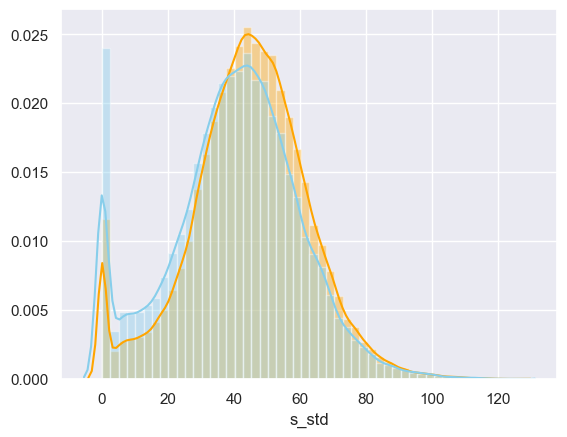

In [86]:
sns.distplot(df.loc[df['pne'] == 0]['s_std'] , color="orange", label="Positive")
sns.distplot(df.loc[df['pne'] == 1]['s_std'] , color="skyblue", label="Negative")
# sns.distplot(df.loc[df['pne'] == 2]['s_std'] , color="yellow", label="Something-else")
plt.show()

In [37]:
df.groupby('emotion', as_index=False)['int_mean'].mean()

,emotion,int_mean
0,amusement,125.037194
1,anger,123.428630
2,awe,118.915183
3,contentment,123.824306
4,disgust,124.503475
5,excitement,125.314530
6,fear,111.314890
7,sadness,116.311477
8,something else,127.478089


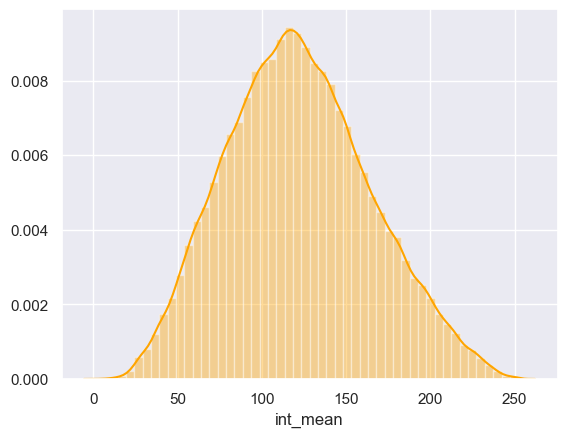

In [17]:
sns.distplot(df['int_mean'] , color="orange", label="intensity_mean")
plt.show()

In [38]:
df.groupby('emotion', as_index=False)['int_std'].mean()

,emotion,int_std
0,amusement,52.561293
1,anger,51.444877
2,awe,51.908494
3,contentment,50.655780
4,disgust,51.502365
5,excitement,52.673534
6,fear,52.319572
7,sadness,50.929974
8,something else,50.416462


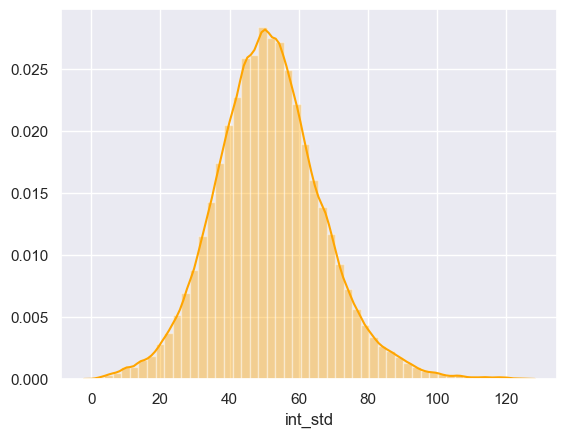

In [16]:
sns.distplot(df['int_std'] , color="orange", label="intensity_std")
plt.show()

In [21]:
df.groupby('emotion', as_index=False)['ave_contrast'].mean()

,emotion,ave_contrast
0,amusement,410.222235
1,anger,441.294184
2,awe,406.074117
3,contentment,362.557860
4,disgust,412.629432
5,excitement,451.525372
6,fear,468.357017
7,sadness,384.639256
8,something else,389.751123


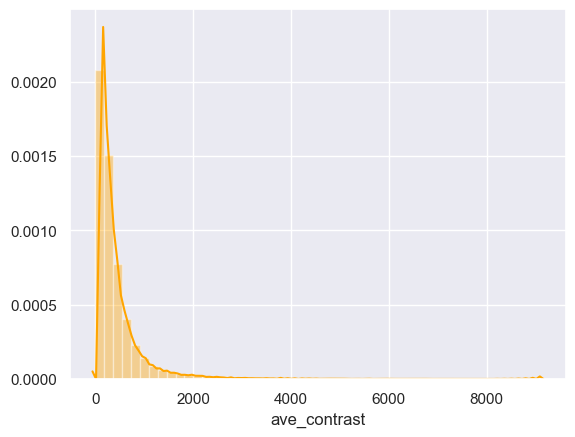

In [18]:
sns.distplot(df['ave_contrast'] , color="orange", label="ave_contrast")
plt.show()

In [22]:
df.groupby('emotion', as_index=False)['ave_contrast'].std()

,emotion,ave_contrast
0,amusement,519.437831
1,anger,605.513567
2,awe,488.889662
3,contentment,414.736452
4,disgust,523.299758
5,excitement,523.970659
6,fear,638.768779
7,sadness,532.781576
8,something else,518.836191


In [7]:
contrast_mean_df = df.groupby('emotion', as_index=False)['ave_contrast'].mean()
contrast_std_df = df.groupby('emotion', as_index=False)['ave_contrast'].std()
contrast_df = contrast_mean_df.merge(contrast_std_df, on=['emotion'], how='left')
contrast_df.columns

Index(['emotion', 'ave_contrast_x', 'ave_contrast_y'], dtype='object')

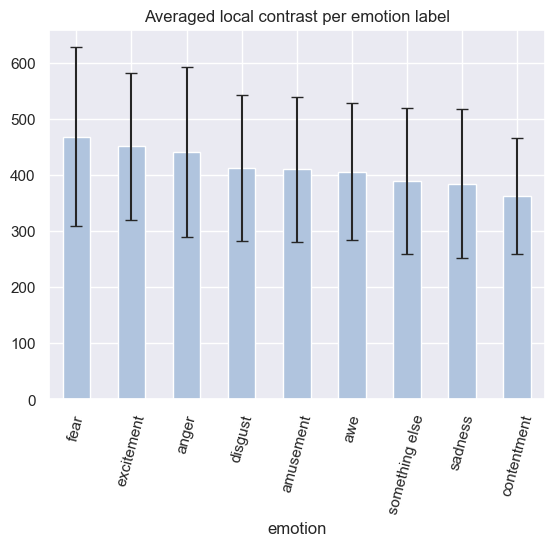

In [99]:
contrast_df["one_fourth_std"] = 0.25*contrast_df["ave_contrast_y"]
contrast_df = contrast_df.sort_values('ave_contrast_x', ascending=False)
contrast_df.plot.bar(color = "lightsteelblue", y = "ave_contrast_x", x = "emotion", legend = False, title = "Averaged local contrast per emotion label", yerr = "one_fourth_std", rot=75, capsize=4)
plt.show()

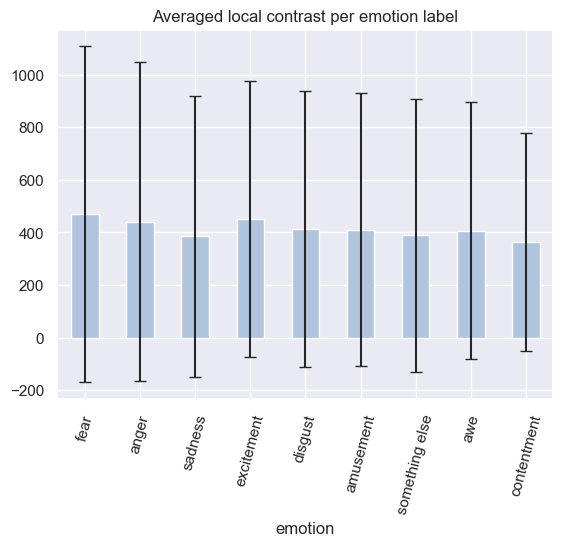

In [102]:
contrast_df["one_fourth_std"] = 0.25*contrast_df["ave_contrast_y"]
contrast_df = contrast_df.sort_values('ave_contrast_y', ascending=False)
contrast_df.plot.bar(color = "lightsteelblue", y = "ave_contrast_x", x = "emotion", legend = False, title = "Averaged local contrast per emotion label", yerr = "ave_contrast_y", rot=75, capsize=4)
plt.show()

In [48]:
df.groupby('emotion', as_index=False)['ave_energy'].mean()

,emotion,ave_energy
0,amusement,0.048907
1,anger,0.056990
2,awe,0.035202
3,contentment,0.034022
4,disgust,0.045991
5,excitement,0.037213
6,fear,0.041585
7,sadness,0.038572
8,something else,0.051486


In [11]:
df.groupby('emotion', as_index=False)['ave_energy'].std()

,emotion,ave_energy
0,amusement,0.076848
1,anger,0.086689
2,awe,0.051200
3,contentment,0.052001
4,disgust,0.071556
5,excitement,0.059402
6,fear,0.062607
7,sadness,0.058237
8,something else,0.079708


In [46]:
df.groupby('emotion', as_index=False)['ave_homogeneity'].mean()

,emotion,ave_homogeneity
0,amusement,0.258428
1,anger,0.276744
2,awe,0.215205
3,contentment,0.215114
4,disgust,0.245521
5,excitement,0.222425
6,fear,0.221866
7,sadness,0.222716
8,something else,0.265594


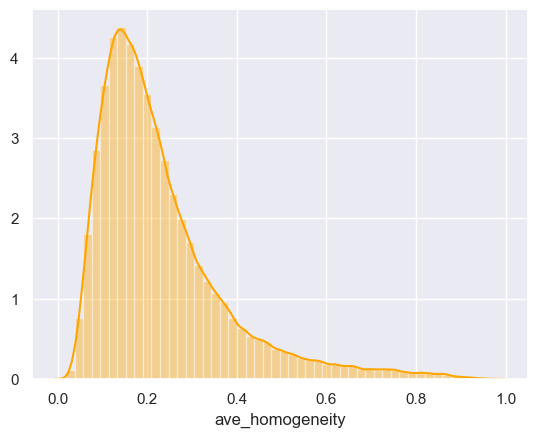

In [19]:
sns.distplot(df['ave_homogeneity'] , color="orange", label="ave_homogeneity")
plt.show()

In [49]:
df.groupby('emotion', as_index=False)['num_of_lines'].mean()

,emotion,num_of_lines
0,amusement,0.010336
1,anger,0.010065
2,awe,0.011415
3,contentment,0.011558
4,disgust,0.010658
5,excitement,0.010867
6,fear,0.011367
7,sadness,0.011519
8,something else,0.010461


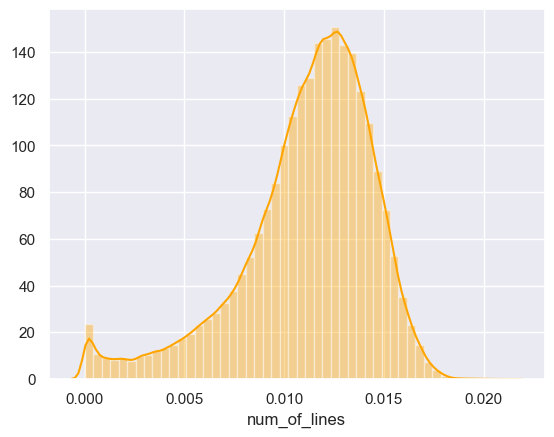

In [20]:
sns.distplot(df['num_of_lines'] , color="orange", label="normalised_num_of_lines")
plt.show()

In [81]:
df.groupby('emotion', as_index=False)['mean_len'].mean()

,emotion,mean_len
0,amusement,15.727889
1,anger,17.900401
2,awe,14.820844
3,contentment,15.191906
4,disgust,15.666332
5,excitement,15.506056
6,fear,14.962483
7,sadness,15.211437
8,something else,16.885816


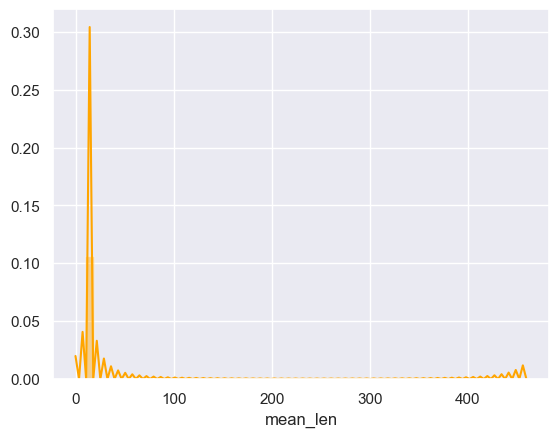

In [21]:
sns.distplot(df['mean_len'] , color="orange", label="mean_len_of_lines")
plt.show()

In [83]:
mean_len_df = df.groupby('emotion', as_index=False)['mean_len'].mean()
std_len_df = df.groupby('emotion', as_index=False)['mean_len'].std()
len_df = mean_len_df.merge(std_len_df, on=['emotion'], how='left')
len_df.columns

Index(['emotion', 'mean_len_x', 'mean_len_y'], dtype='object')

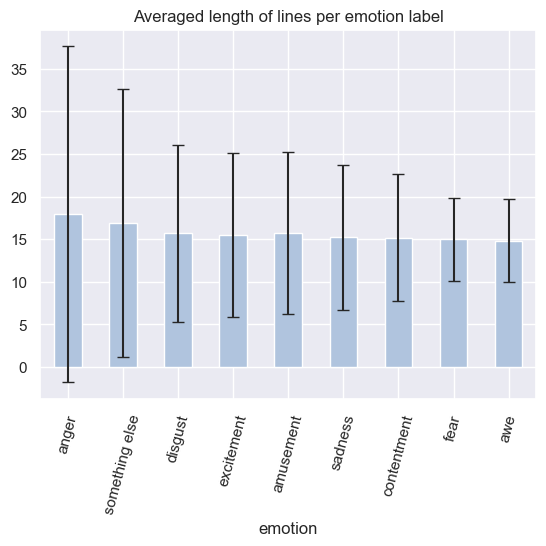

In [100]:
len_df = len_df.sort_values('mean_len_y', ascending=False)
len_df.plot(kind = "bar", color = "lightsteelblue", y = "mean_len_x", x = "emotion", legend = False, title = "Averaged length of lines per emotion label", yerr = "mean_len_y", rot=75, capsize=4)
plt.show()

#### Convert real-valued features into binary features

In [32]:
df.rename(columns={'num_of_lines':'norm_num_of_lines'}, inplace=True)
del df['Unnamed: 0']
print(df.columns)

Index(['art_style', 'painting', 'emotion', 'utterance', 'repetition', 'split',
       'tokens', 'tokens_len', 'utterance_spelled', 'tokens_encoded',
       'emotion_label', 'pne', 'image_feature_vector',
       'normalised_image_feature_vector', 'h_mean', 'h_std', 's_mean', 's_std',
       'v_mean', 'v_std', 'int_mean', 'int_std', 'ave_contrast',
       'ave_correlation', 'ave_energy', 'ave_homogeneity', 'norm_num_of_lines',
       'mean_len'],
      dtype='object')


In [70]:
# Create binary-valued features based on real-valued image features
# df['red'] = np.select([(df['h_mean'] > 0 & df['h_mean'] <= 30),(df['h_mean'] > 150 & df['h_mean'] <= 180)],[1,1],0)
# df['overall_red'] = ((df['h_mean'] > 0) & (df['h_mean'] <= 30) & (df['h_std'] <= 20)).astype(int)
# df['overall_red'] = ((df['h_mean'] > 150) & (df['h_mean'] <= 180) & (df['h_std'] <= 20)).astype(int)
df['overall_red'] = (((0 < df['h_mean']) & (df['h_mean'] <= 30)) & (df['h_std'] <= 20)) | (((150 < df['h_mean']) & (df['h_mean'] <= 180)) & (df['h_std'] <= 20)).astype(int)
df['overall_green'] = ((df['h_mean'] > 30) & (df['h_mean'] <= 90) & (df['h_std'] <= 20)).astype(int)
df['overall_blue'] = ((df['h_mean'] > 90) & (df['h_mean'] <= 150) & (df['h_std'] <= 20)).astype(int)
df['large_hue_variation'] = (df['h_std'] > 80).astype(int)
df['high_saturation'] = (df['s_mean'] > 200).astype(int)
# df['large_saturation_variation'] = (df['s_std'] > 43).astype(int)
# df['high_intensity'] = (df['v_mean'] > 200).astype(int)
df['high_global_contrast'] = (df['v_std'] > 90).astype(int)
df['high_local_contrast'] = (df['ave_contrast'] > 2000).astype(int)
df['frequent_repeated_pattern'] = (df['ave_homogeneity'] > 0.80).astype(int)
df['large_number_of_lines'] = (df['norm_num_of_lines'] > 0.017).astype(int)
df['long_lines_on_average'] = (df['mean_len'] > 100).astype(int)


In [71]:
print(df.overall_red.sum())
print(df.overall_green.sum())
print(df.overall_blue.sum())
print(df.large_hue_variation.sum())
print(df.high_saturation.sum())
print(df.high_global_contrast.sum())
print(df.high_local_contrast.sum())
print(df.frequent_repeated_pattern.sum())
print(df.large_number_of_lines.sum()) 
print(df.long_lines_on_average.sum())

80572
12741
5473
3001
3376
6465
8779
3035
2635
1069


In [72]:
df['binary_feature_vector'] = df[['overall_red', 'overall_green', 'overall_blue',
       'large_hue_variation', 'high_saturation', 'high_global_contrast',
       'high_local_contrast', 'frequent_repeated_pattern',
       'large_number_of_lines', 'long_lines_on_average']].values.tolist()

In [10]:
print(df.columns)

Index(['art_style', 'painting', 'emotion', 'utterance', 'repetition', 'split',
       'tokens', 'tokens_len', 'utterance_spelled', 'tokens_encoded',
       'emotion_label', 'pne', 'image_feature_vector',
       'normalised_image_feature_vector', 'h_mean', 'h_std', 's_mean', 's_std',
       'v_mean', 'v_std', 'int_mean', 'int_std', 'ave_contrast',
       'ave_correlation', 'ave_energy', 'ave_homogeneity', 'norm_num_of_lines',
       'mean_len', 'overall_red', 'overall_green', 'overall_blue',
       'large_hue_variation', 'high_saturation', 'high_global_contrast',
       'high_local_contrast', 'frequent_repeated_pattern',
       'large_number_of_lines', 'long_lines_on_average',
       'binary_feature_vector'],
      dtype='object')


#### Analysis of binary image features

In [10]:
df.groupby('emotion', as_index=False)['red'].mean()

,emotion,red
0,amusement,0.366993
1,anger,0.404970
2,awe,0.350035
3,contentment,0.328825
4,disgust,0.412610
5,excitement,0.313423
6,fear,0.405849
7,sadness,0.430158
8,something else,0.396039


In [13]:
df.groupby('pne', as_index=False)['red'].mean()

,pne,red
0,0,0.338389
1,1,0.417031
2,2,0.396039


In [11]:
df.groupby('emotion', as_index=False)['green'].mean()

,emotion,green
0,amusement,0.549718
1,anger,0.501657
2,awe,0.561726
3,contentment,0.593662
4,disgust,0.511668
5,excitement,0.600303
6,fear,0.492460
7,sadness,0.483622
8,something else,0.511858


In [14]:
df_green = df.groupby('pne', as_index=False)['green'].mean()

,pne,green
0,0,0.579227
1,1,0.492944
2,2,0.511858


In [15]:
df.groupby('emotion', as_index=False)['blue'].mean()

,emotion,blue
0,amusement,0.083289
1,anger,0.093373
2,awe,0.088239
3,contentment,0.077513
4,disgust,0.075722
5,excitement,0.086274
6,fear,0.101691
7,sadness,0.086219
8,something else,0.092104


In [16]:
df.groupby('pne', as_index=False)['blue'].mean()

,pne,blue
0,0,0.082384
1,1,0.090025
2,2,0.092104


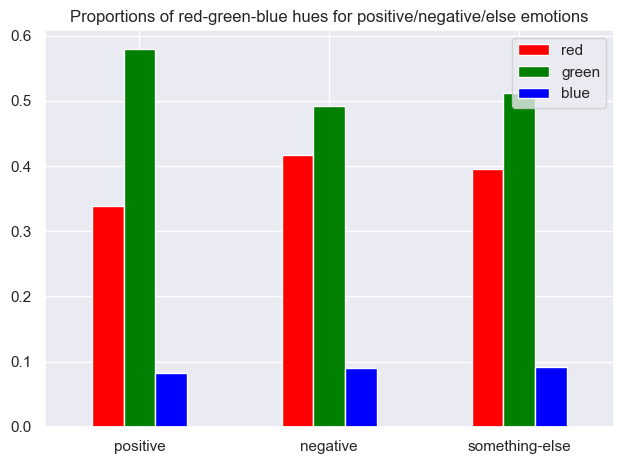

In [60]:
tags = ("positive", "negative", "something-else")
red = (0.338389, 0.417031, 0.396039)
green = (0.579227, 0.492944, 0.511858)
blue = (0.082384, 0.090025, 0.092104)
# Create a dataframe
df_color = pd.DataFrame({"red": red, "green": green, "blue": blue}, index=tags)
df_color.plot.bar(rot=0, color={"red", "green", "blue"}, title = "Proportions of red-green-blue hues for positive/negative/else emotions")
plt.tight_layout() # fit labels etc. nicely into the plot
plt.show()

In [69]:
print(df.pne)

0         2
1         1
2         2
3         0
4         0
         ..
454679    0
454680    0
454681    0
454682    0
454683    1
Name: pne, Length: 454684, dtype: int64


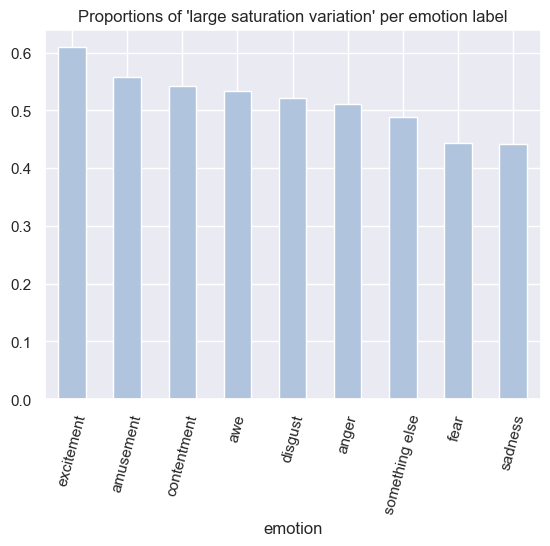

In [92]:
s_var_df = df.groupby('emotion', as_index=False)['large_saturation_variation'].mean()
s_var_df = s_var_df.sort_values('large_saturation_variation', ascending=False)
s_var_df.plot(kind = "bar", color = "lightsteelblue", y = "large_saturation_variation", x = "emotion", legend = False, title = "Proportions of 'large saturation variation' per emotion label", rot=75)
plt.show()

#### Save all the produced features

In [73]:
# Save the complete df
df.to_csv('/Users/Cherry0904/Desktop/data_with_img_features/complete_binary_df.csv', sep=',', encoding='utf-8')

In [74]:
# Keep the most important columns and save it again
subset_df = df[['art_style', 'painting', 'emotion', 'utterance', 'repetition', 'split',
       'tokens', 'tokens_len', 'utterance_spelled', 'tokens_encoded',
       'emotion_label', 'pne', 'image_feature_vector', 'binary_feature_vector']]

subset_df.to_csv('/Users/Cherry0904/Desktop/data_with_img_features/concise_binary_df.csv', sep=',', encoding='utf-8')

In [16]:
df.shape

(454684, 39)

In [75]:
df.isna().sum()

art_style                          0
painting                           0
emotion                            0
utterance                          0
repetition                         0
split                              0
tokens                             0
tokens_len                         0
utterance_spelled                  0
tokens_encoded                     0
emotion_label                      0
pne                                0
image_feature_vector               0
normalised_image_feature_vector    0
h_mean                             0
h_std                              0
s_mean                             0
s_std                              0
v_mean                             0
v_std                              0
int_mean                           0
int_std                            0
ave_contrast                       0
ave_correlation                    0
ave_energy                         0
ave_homogeneity                    0
norm_num_of_lines                  0
m

In [76]:
# Save the df with only two cols 
df_small = df[['painting','overall_red', 'overall_green', 'overall_blue',
       'large_hue_variation', 'high_saturation', 'high_global_contrast',
       'high_local_contrast', 'frequent_repeated_pattern',
       'large_number_of_lines', 'long_lines_on_average']]
df_small = df_small.drop_duplicates(keep='last')
# df_small['binary_feature_vector'] = df_small[['overall_red', 'overall_green', 'overall_blue',
#        'large_hue_variation', 'high_saturation', 'high_global_contrast',
#        'high_local_contrast', 'frequent_repeated_pattern',
#        'large_number_of_lines', 'long_lines_on_average']].values.tolist()
# df_small = df_small[['painting', 'binary_feature_vector']]
df_small.rename(columns={'painting':'id'}, inplace=True)
# print(df_small.shape)
print(df_small.columns)
df_small.to_csv('/Users/Cherry0904/Desktop/binary_img_features_each_image.csv', index=False, sep=',', encoding='utf-8')

Index(['id', 'overall_red', 'overall_green', 'overall_blue',
       'large_hue_variation', 'high_saturation', 'high_global_contrast',
       'high_local_contrast', 'frequent_repeated_pattern',
       'large_number_of_lines', 'long_lines_on_average'],
      dtype='object')


In [77]:
df_with_binary_features = df[['painting', 'overall_red', 'overall_green', 'overall_blue',
       'large_hue_variation', 'high_saturation', 'high_global_contrast',
       'high_local_contrast', 'frequent_repeated_pattern',
       'large_number_of_lines', 'long_lines_on_average']]
df_with_binary_features.rename(columns={'painting':'id'}, inplace=True)
# Keep only unique paintings
df_with_binary_features = df_with_binary_features.drop_duplicates(keep='last')
df_with_binary_features.shape
       

/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:5034: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


(80031, 11)

In [78]:
import os
pd.set_option('display.max_rows', 2000)

project_dir = '/Users/Cherry0904/Desktop/roko-for-charlize'
path = os.path.join(project_dir, "Extracted_Concepts/artemis_2000_0.9_final_dict_old_codex.pkl")
luke_output = pd.read_pickle(path)

labels_keys = ['id', 'label', 'concepts']
labels_dict = {key: luke_output[key] for key in labels_keys}
labels = pd.DataFrame.from_dict(labels_dict) # a df containing image_name (id), label, concept array of 0 or 1
# print(labels)
# Add the binary image features to each concept array by matching the image_name
binary_img_features_df_csv = '/Users/Cherry0904/Desktop/binary_img_features_each_image.csv'
# binary_img_features_df_csv = '/vol/bitbucket/yy3219/roko-for-charlize/Thesis_Data/Data/binary_img_features_each_image.csv'
binary_img_features_df = pd.read_csv(binary_img_features_df_csv)
# binary_img_features_df = binary_img_features_df[['id', 'binary_feature_vector']]
# print(binary_img_features_df.isna().sum())
# binary_img_features_df['binary_feature_vector'] = binary_img_features_df['binary_feature_vector'].apply(literal_eval) # Turn the string into a list (not array)
new_df = pd.merge(labels, binary_img_features_df, on='id', how='left')
new_df = new_df.fillna(0) # Fill all the NaN values with 0
new_df['binary_feature_vector'] = new_df[['overall_red', 'overall_green', 'overall_blue',
       'large_hue_variation', 'high_saturation', 'high_global_contrast',
       'high_local_contrast', 'frequent_repeated_pattern',
       'large_number_of_lines', 'long_lines_on_average']].values.tolist()
# new_df = new_df[['id', 'label', 'concepts', 'binary_feature_vector']]
# Append each binary image feature vector to the concept array
new_df['merged_concepts'] = new_df.apply(lambda x: np.append(np.asarray(x.binary_feature_vector), x.concepts), axis = 1)
# Replace the original concept array in 'labels' with the updated one 
labels['concepts'] = new_df['merged_concepts']

print(len(labels['concepts'][0]))
print(new_df.isna().sum())

357
id                           0
label                        0
concepts                     0
overall_red                  0
overall_green                0
overall_blue                 0
large_hue_variation          0
high_saturation              0
high_global_contrast         0
high_local_contrast          0
frequent_repeated_pattern    0
large_number_of_lines        0
long_lines_on_average        0
binary_feature_vector        0
merged_concepts              0
dtype: int64


In [79]:
f = new_df.loc[new_df['binary_feature_vector'].isnull(), 'binary_feature_vector']
for i in f:
    i = [0,0]
print(f)

Series([], Name: binary_feature_vector, dtype: object)


In [80]:
print(new_df.overall_red.sum())
print(new_df.overall_green.sum())
print(new_df.overall_blue.sum())
print(new_df.large_hue_variation.sum())
print(new_df.high_saturation.sum())
print(new_df.high_global_contrast.sum())
print(new_df.high_local_contrast.sum())
print(new_df.frequent_repeated_pattern.sum())
print(new_df.large_number_of_lines.sum()) 
print(new_df.long_lines_on_average.sum())


342
48.0
26.0
15.0
11.0
34.0
38.0
22.0
11.0
9.0


In [19]:
artemis_3cols_df = artemis_merged_df[['emotion', 'utterance']].copy()
artemis_3cols_df.utterance = artemis_3cols_df.utterance.apply(lambda x: x.replace(',', ''))
artemis_3cols_df.utterance = artemis_3cols_df.utterance.apply(lambda x: ' '.join(x.split()))
artemis_3cols_df.to_csv('/Users/Cherry0904/Desktop/artemis_3_cols.csv', sep=',', encoding='utf-8')

In [20]:
# Create a dataset with 3000 randomly sampled datapoints
artemis_3_cols_csv = '/Users/Cherry0904/Desktop/artemis_3_cols.csv'
artemis_3_cols_df = pd.read_csv(artemis_3_cols_csv, encoding='utf-8')
del artemis_3_cols_df['Unnamed: 0']
artemis_3_cols_3000_df = artemis_3cols_df.sample(n=3000, random_state=123)
print(artemis_3_cols_3000_df)
artemis_3_cols_3000_df.to_csv('/Users/Cherry0904/Desktop/artemis_3_cols_3000.csv', sep=',', encoding='utf-8')

            emotion                                          utterance
270432      disgust  The man looks like a drug addict who is stoned...
406802      disgust  The dancing lady's long arms are really unnatu...
302372  contentment  the eleborate set up makes it seem like the ma...
261570          awe  The framing of the town draws attention to the...
365448      sadness  the clothing is so rough and the background so...
...             ...                                                ...
372119      disgust         It appears the testicle is being squashed.
128137   excitement  Street parades are an exciting time and there ...
113762  contentment  The lights and sky makes it look like a cheery...
264742  contentment  The boy at the front seems to be eavesdropping...
296610         fear  The man looks like a zombie with mouths for ha...

[3000 rows x 2 columns]


In [24]:
artemis_3_cols_1000_df = artemis_3cols_df.sample(n=1000, random_state=100)
print(artemis_3_cols_1000_df)

               emotion                                          utterance
21558      contentment  The seashore at sunset on what looks like a ca...
350824     contentment  The fruit looks so ripe and fuzzy so it's perf...
198710       amusement  These lines although not perfectly perpendicul...
304743            fear  The doll-like faces peering over a naked man l...
216816     contentment  The different colors of dresses for the ladies...
...                ...                                                ...
125904     contentment  the combination of the blue and orange is soot...
442524  something else  This gives me respect for the artist's talent ...
338609      excitement  the dark lines used makes the man look like he...
267368             awe  the sweep of yellow toward the bottom adds a l...
266285     contentment  i like the attention to the detail around the ...

[1000 rows x 2 columns]


In [22]:
# Create a dataset with only portraits
artemis_4cols_df = artemis_merged_df[['art_style', 'painting', 'emotion', 'utterance']].copy()

wikiart_genre_labels_file = '../../data/wiki_art_genre_class.csv'
# Enrich the Dataframe with the genre meta-data.
# Add art-genre labels from WikiArt (not all artworks have this). Makes new data-frame.
genre_info = pd.read_csv(wikiart_genre_labels_file)
df_with_genre = pd.merge(artemis_4cols_df, genre_info, on=['art_style', 'painting'])
df_with_genre.utterance = df_with_genre.utterance.apply(lambda x: x.replace(',', ''))
df_with_genre.utterance = df_with_genre.utterance.apply(lambda x: ' '.join(x.split()))

portrait_df = df_with_genre.loc[df_with_genre['genre'] == 'portrait']
artemis_3_cols_portrait_df = portrait_df[['emotion', 'utterance']].copy()
print(artemis_3_cols_portrait_df)
artemis_3_cols_portrait_df.to_csv('/Users/Cherry0904/Desktop/artemis_3_cols_portrait.csv', sep=',', encoding='utf-8')

               emotion                                          utterance
0       something else  She seems very happy in the picture and you wa...
1              sadness  This woman has really knotty hands which makes...
2       something else  When looking at this woman I am filled with cu...
3          contentment  A woman looking at ease peaceful and satisfied...
4                  awe  She looks like a lady from that past that migh...
...                ...                                                ...
358343       amusement  The woman has a slight and funny looking smirk...
358344         sadness  The woman appears to have small bloody cuts on...
358345         sadness  the stern look makes me feel that this charact...
358346     contentment  The eyes of the woman are quite interesting an...
358347     contentment  I feel content with this painting it really di...

[76812 rows x 2 columns]
